# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [39]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [30]:
response_data = requests.get(btc_url)
response_data2 = requests.get(eth_url)
btc_data = response_data.json()
eth_data = response_data2.json()
print(json.dumps(btc_data, indent = 4))
print(json.dumps(eth_data, indent = 4))


{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18597843,
            "total_supply": 18597843,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 35165.0,
                    "volume_24h": 110514051582,
                    "market_cap": 659901199472,
                    "percentage_change_1h": 1.73673196120052,
                    "percentage_change_24h": -7.09395365688382,
                    "percentage_change_7d": 11.5804993418541,
                    "percent_change_1h": 1.73673196120052,
                    "percent_change_24h": -7.09395365688382,
                    "percent_change_7d": 11.5804993418541
                },
                "CAD": {
                    "price": 44930.3205,
                    "volume_24h": 141203803706.321,
                    "m

In [29]:
# Fetch current BTC price
btc_price = btc_data["data"]["1"]["quotes"]["USD"]["price"]

# Fetch current ETH price
eth_price = eth_data["data"]["1027"]["quotes"]["USD"]["price"]

# Compute current value of my crpto
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $42589.20
The current value of your 5.3 ETH is $5714.30


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [42]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [46]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")


# Create the Alpaca API object
alpaca = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version = "v2")

In [61]:
# Format current date as ISO format
today = pd.Timestamp("1/11/2021", tz = "America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(tickers, timeframe, start = today, end = today).df

# Preview DataFrame
df_portfolio.head().reset_index()

time     AGG                                      SPY  \
                               open    high     low   close   volume    open   
0 2021-01-11 00:00:00-05:00  117.02  117.05  116.89  116.89  5047096  377.85   

                                       
     high       low   close    volume  
0  380.58  377.7189  378.74  44814805

In [63]:
# Pick AGG and SPY close prices
agg_close_price = df_portfolio["AGG"]["close"][0]
spy_close_price = df_portfolio["SPY"]["close"][0]


# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $116.89
Current SPY closing price: $378.74


In [64]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $18937.00
The current value of your 200 AGG shares is $23378.00


### Savings Health Analysis

In [79]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
amount_dict = {"amount": [my_btc_value + my_eth_value, my_agg_value + my_spy_value]}
df_savings = pd.DataFrame(amount_dict, index =["crypto", "shares"])



# Display savings DataFrame
display(df_savings)

,amount
crypto,48303.501
shares,42315.000


array([<AxesSubplot:ylabel='amount'>], dtype=object)

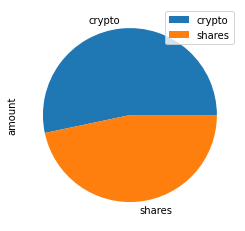

In [82]:
# Plot savings pie chart
df_savings.plot(kind = "pie", subplots = True)

In [88]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
savings = df_savings["amount"]["crypto"] + df_savings["amount"]["shares"]

# Validate saving health
if savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif savings == emergency_fund:
    print("Congratulations! You have reached your emergency fund goal.")
else:
    print(f"You are ${emergency_fund - savings} from your emergency fund goal .")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [109]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-01-11', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-01-11', tz='America/New_York').isoformat()
timeframe = "1D"
tickers = ["AGG", "SPY"]
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

In [ ]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_stock_data.head().dropna()

In [111]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year = MCSimulation(portfolio_data = df_stock_data, weights = [.4,.6], num_simulation = 500, num_trading_days = 252 * 30)

In [112]:
# Printing the simulation input data
MC_thirty_year.portfolio_data.head()

AGG                                     \
                             open     high      low   close   volume   
time                                                                   
2016-01-12 00:00:00-05:00  108.44  108.815  108.360  108.59  2988781   
2016-01-13 00:00:00-05:00  108.60  108.930  108.550  108.85  2752696   
2016-01-14 00:00:00-05:00  108.79  108.890  108.581  108.79  5000022   
2016-01-15 00:00:00-05:00  109.08  109.120  108.830  108.94  3049283   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2016-01-12 00:00:00-05:00     0.002215  193.82  194.55  191.14  193.62   
2016-01-13 00:00:00-05:00     0.002394  194.45  194.86  188.38  188.84   
2016-01-14 00:00:00-05:00    -0.000551  189.56  193.26  187.66  191.89   
2016-01-15 00:00:00-05:00     0.001379  186.77  188.76  185.52  187.78   

                                                   
                              volume daily_return  
time                                               
2016-01-12 00:00:00-05:00  139523772     0.008017  
2016-01-13 00:00:00-05:00  183463525    -0.024688  
2016-01-14 00:00:00-05:00  186907832     0.016151  
2016-01-15 00:00:00-05:00  240958526    -0.021419

In [113]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005728,0.994001,0.996115,1.005094,1.002186,1.008096,0.995545,1.006873,0.998379,0.998131,...,0.992645,0.988922,0.999686,0.995230,1.003805,0.997782,0.997504,0.998247,1.006696,0.985670
2,1.020411,0.994411,0.994730,1.005991,1.017826,1.010936,0.988468,1.011168,1.001970,0.997609,...,0.992964,0.985763,0.989355,0.996031,1.008065,0.989006,1.002992,1.010361,1.006845,0.990402
3,1.031151,0.988414,0.985410,1.015073,1.023288,1.014180,0.988589,1.001892,0.998079,0.999014,...,0.983168,0.976662,0.978059,0.993140,1.014489,0.989061,0.994979,1.003246,1.006451,1.000294
4,1.026086,0.992415,0.983949,1.008465,1.024455,1.007079,0.995769,1.008469,1.005238,0.992360,...,0.971708,0.972494,0.966467,0.991051,1.012212,1.000141,1.011608,1.017961,1.013808,0.998310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,27.782166,19.331854,7.334684,25.046680,9.506778,11.095117,14.309690,21.888411,69.156855,18.418073,...,10.687252,34.133759,21.158774,15.169095,5.361020,26.053863,33.438676,8.464792,25.249915,12.194460
7557,27.742001,19.579692,7.454289,25.061651,9.535036,11.179295,14.252441,21.961494,69.561716,18.261189,...,10.711417,33.974582,21.149255,15.166341,5.424792,25.950602,33.214739,8.575512,25.157959,12.184978
7558,27.686896,19.494660,7.431539,24.988881,9.631402,11.315358,14.179141,21.808185,69.484404,18.107946,...,10.802522,33.892076,21.305435,15.192226,5.415506,26.068821,33.318870,8.523299,25.187198,12.107637
7559,27.666684,19.882037,7.447393,24.697259,9.548820,11.300999,14.056672,21.625240,69.948751,18.121933,...,10.810896,33.996468,21.400826,15.525552,5.395312,25.994678,33.114435,8.502435,25.138617,12.077577


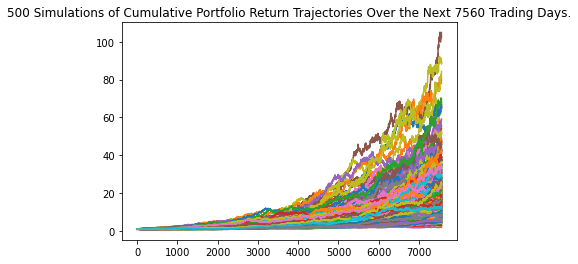

In [114]:
# Plot simulation outcomes
line_plot = MC_thirty_year.plot_simulation()

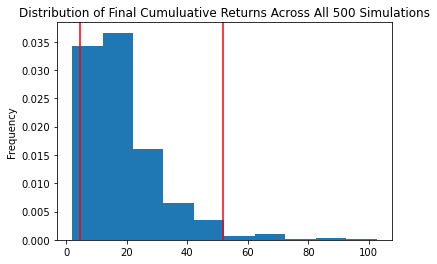

In [115]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirty_year.plot_distribution()

### Retirement Analysis

In [116]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirty_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             18.884401
std              13.101046
min               2.006655
25%              10.476924
50%              15.418521
75%              23.561505
max             102.557458
95% CI Lower      4.753082
95% CI Upper     51.877888
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [117]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $95061.63 and $1037557.77


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [136]:
# Set initial investment
initial_investment2 = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment2,2)
ci_upper = round(tbl[9]*initial_investment2,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment2} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $142592.45 and $1556336.65


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [119]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year = MCSimulation(portfolio_data = df_stock_data, weights = [.4,.6], num_simulation = 500, num_trading_days = 252 * 5)

In [121]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002468,0.997241,0.994024,1.002582,1.007766,0.995775,1.008060,0.995026,1.009596,1.008234,...,0.984740,1.004244,0.995109,0.995385,0.993651,0.991957,0.992797,1.007049,0.998922,1.000768
2,0.992030,1.001942,0.977460,1.008304,1.017060,1.005762,1.001357,1.002882,1.006792,1.002218,...,0.978535,1.005552,0.995235,0.980604,0.993961,0.994732,0.993342,1.010265,0.992684,1.015901
3,0.989452,1.002345,0.984793,1.019538,1.033938,1.002781,0.999325,1.008722,1.011708,0.999930,...,0.981482,1.011614,0.990874,0.979505,0.998563,0.984606,0.986641,1.010923,0.989473,1.016910
4,0.993776,1.008237,0.975267,1.024399,1.037993,1.000064,1.001580,1.006680,1.007146,1.004916,...,0.981846,1.002871,0.998840,0.971868,1.003707,0.980836,0.993277,1.005407,0.985923,1.025301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.310582,2.039989,1.647791,1.313662,2.059658,2.031941,1.297179,1.607760,1.329253,2.445711,...,1.476454,1.174565,1.379577,1.202146,1.856567,1.593838,1.685145,1.695083,1.213595,1.605406
1257,2.321159,2.038831,1.640866,1.322732,2.040338,2.052016,1.302608,1.615119,1.332614,2.453726,...,1.472944,1.180131,1.376941,1.213348,1.848581,1.589191,1.676027,1.706382,1.210501,1.616199
1258,2.323306,2.027973,1.641297,1.321912,2.042226,2.056747,1.298856,1.625876,1.334082,2.442191,...,1.464743,1.182510,1.380346,1.216898,1.826999,1.606158,1.674401,1.693026,1.209966,1.619404
1259,2.319385,2.024366,1.656167,1.314651,2.022515,2.047285,1.285831,1.624809,1.351228,2.422290,...,1.450872,1.170902,1.377307,1.214291,1.855732,1.592323,1.670134,1.702895,1.215810,1.618351


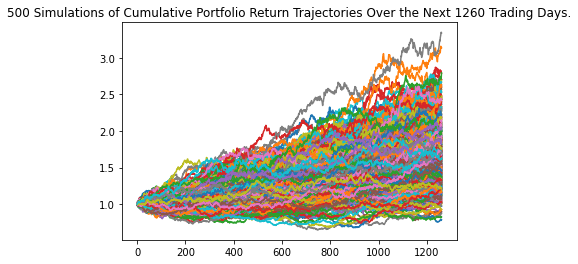

In [122]:
# Plot simulation outcomes
line_plot2 = MC_five_year.plot_simulation()

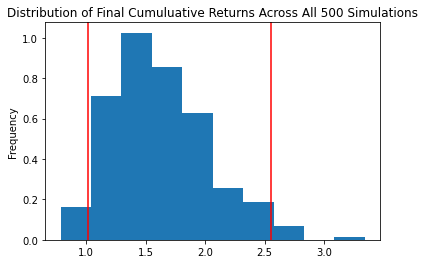

In [123]:
# Plot probability distribution and confidence intervals
dist_plot2 = MC_five_year.plot_distribution()

In [124]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl2 = MC_five_year.summarize_cumulative_return()


# Print summary statistics
print(tbl2)

count           500.000000
mean              1.624653
std               0.406771
min               0.785937
25%               1.325129
50%               1.576721
75%               1.878864
max               3.341106
95% CI Lower      1.012626
95% CI Upper      2.549820
Name: 1260, dtype: float64


In [137]:
# Set initial investment
initial_investment3 = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl2[8]*initial_investment3,2)
ci_upper_five = round(tbl2[9]*initial_investment3,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment3} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $60757.57 and $152989.19


### Ten Years Retirement Option

In [128]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year = MCSimulation(portfolio_data = df_stock_data, weights = [.4,.6], num_simulation = 500, num_trading_days = 252 * 10)

In [129]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005824,0.996903,0.994965,1.016025,1.006712,0.990737,1.002223,1.001896,0.994994,0.997795,...,1.006548,0.996193,0.998225,1.008492,0.999463,0.997941,0.991720,1.001002,1.019112,0.991189
2,1.013148,1.009227,1.003892,1.012344,1.015568,0.990504,0.990382,1.007509,1.006633,0.990763,...,0.987025,1.018228,0.992375,1.002878,1.001806,1.007085,0.987276,1.002121,1.031927,0.987956
3,0.998958,1.002747,1.005314,1.019441,1.016380,0.986569,0.979268,1.019786,1.004552,0.988253,...,0.989619,1.021822,0.989187,1.001173,1.006915,1.007056,0.992727,1.001288,1.027173,0.992849
4,0.997002,0.991923,1.001322,1.020938,1.017737,0.989505,0.984041,1.029647,1.009336,0.991128,...,0.991707,1.010764,0.995925,0.996233,1.001089,1.005920,0.996891,0.999537,1.019921,1.000359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.019615,1.488942,1.517160,2.146285,3.322437,2.172544,3.544576,3.553283,1.657787,1.894341,...,2.518926,1.987645,5.046041,2.930364,4.501316,2.644201,2.331488,1.675015,2.493436,2.292238
2517,2.027964,1.475330,1.505984,2.160049,3.331824,2.176131,3.514506,3.546498,1.659535,1.885697,...,2.543904,1.978242,5.002891,2.911296,4.515455,2.635054,2.313561,1.661732,2.505858,2.276540
2518,2.044257,1.471195,1.502637,2.174633,3.318600,2.151671,3.534689,3.557119,1.673339,1.871815,...,2.572641,1.987614,5.020928,2.915328,4.501012,2.629602,2.313658,1.652687,2.507747,2.254872
2519,2.050890,1.446360,1.511550,2.162728,3.359809,2.155454,3.535605,3.533926,1.671349,1.873674,...,2.553314,1.997651,5.043121,2.924543,4.549045,2.669352,2.282616,1.683133,2.522571,2.216765


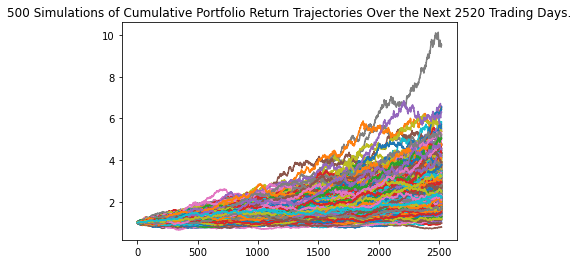

In [130]:
# Plot simulation outcomes
line_plot3 = MC_ten_year.plot_simulation()

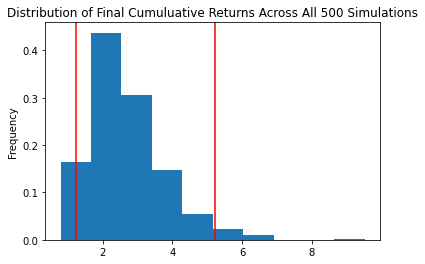

In [131]:
# Plot probability distribution and confidence intervals
dist_plot3 = MC_ten_year.plot_distribution()

In [132]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl3 = MC_ten_year.summarize_cumulative_return()

# Print summary statistics
print(tbl3)

count           500.000000
mean              2.662798
std               1.065344
min               0.788565
25%               1.909692
50%               2.449961
75%               3.244644
max               9.524743
95% CI Lower      1.230588
95% CI Upper      5.234414
Name: 2520, dtype: float64


In [138]:
# Set initial investment
initial_investment4 = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl3[8]*initial_investment4,2)
ci_upper_ten = round(tbl3[9]*initial_investment4,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment4} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $73835.26 and $314064.83
